In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
session=pd.read_csv('sessions.csv')

In [3]:
session[session['user_id']=='5uwns89zht']

,user_id,action,action_type,action_detail,device_type,secs_elapsed
5555280,5uwns89zht,show,view,user_profile,-unknown-,79.0
5555281,5uwns89zht,search,click,view_search_results,-unknown-,17962.0
5555282,5uwns89zht,search,click,view_search_results,-unknown-,64883.0
5555283,5uwns89zht,show,view,p3,-unknown-,31180.0
5555284,5uwns89zht,authenticate,submit,login,iPhone,NaN
5555285,5uwns89zht,reviews,data,listing_reviews,-unknown-,1097.0
5555286,5uwns89zht,active,-unknown-,-unknown-,-unknown-,1046.0
5555287,5uwns89zht,search,click,view_search_results,-unknown-,2940.0


In [4]:
train=pd.read_csv('train_users_2.csv')
test=pd.read_csv('test_users.csv')

In [5]:
test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [6]:
train['country_destination'].isna().sum()

0

In [7]:
train['date_account_created']=pd.to_datetime(train['date_account_created'])

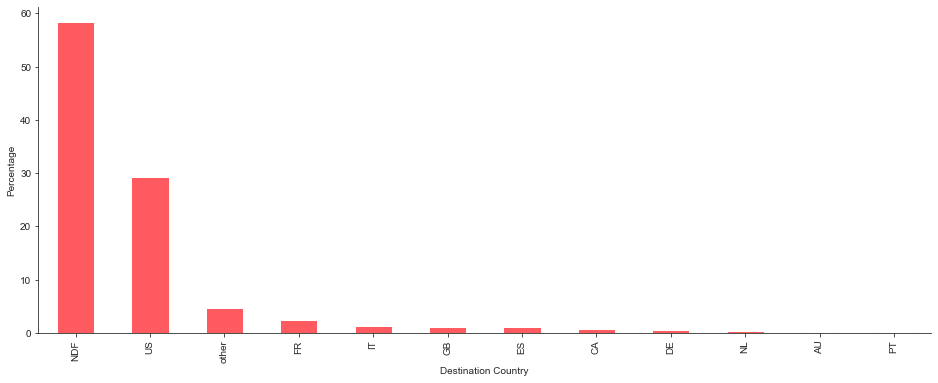

In [8]:
sns.set_style('ticks')
plt.figure(figsize=(16,6))
destination_percentage = train['country_destination'].value_counts() / train.shape[0] * 100
destination_percentage.plot(kind='bar',color='#ff5a5f')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

57% customer in data didn't booked yet

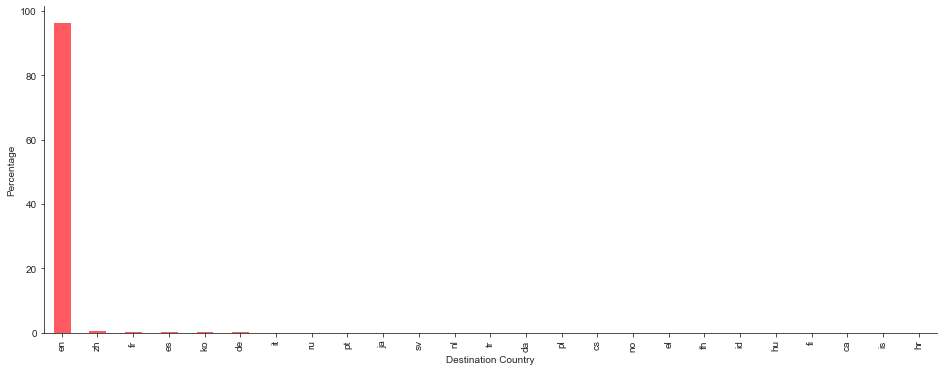

In [9]:
sns.set_style('ticks')
plt.figure(figsize=(16,6))
destination_percentage = train.language.value_counts() / train.shape[0] * 100
destination_percentage.plot(kind='bar',color='#ff5a5f')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

most of customer used english as language in their apps

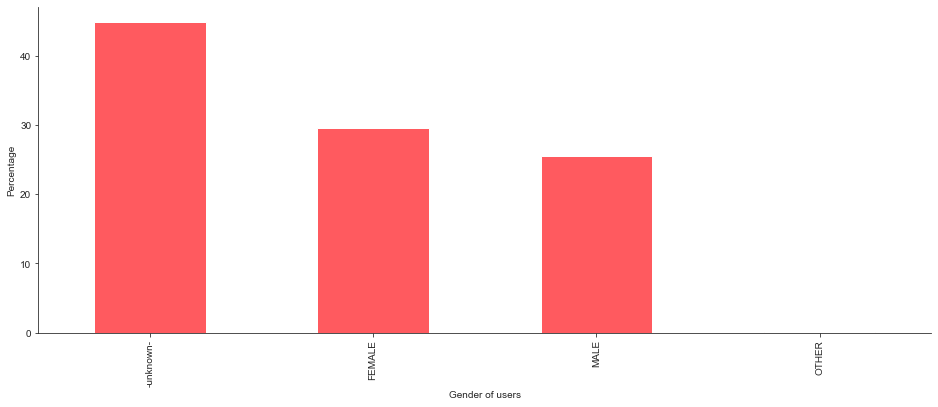

In [10]:
sns.set_style('ticks')
plt.figure(figsize=(16,6))
gender_percentage = train['gender'].value_counts() / train.shape[0] * 100
gender_percentage.plot(kind='bar',color='#ff5a5f')
plt.xlabel('Gender of users')
plt.ylabel('Percentage')
sns.despine()

45 % customer gender information not present

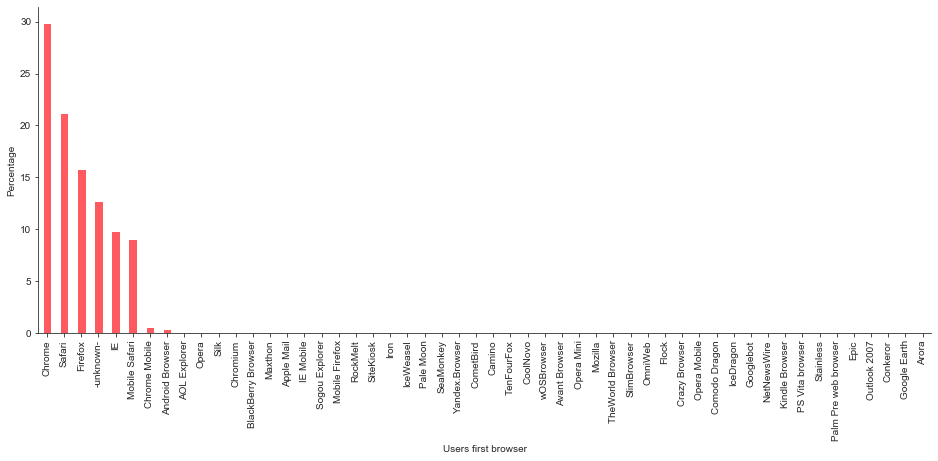

In [11]:
sns.set_style('ticks')
plt.figure(figsize=(16,6))
gender_percentage = train['first_browser'].value_counts() / train.shape[0] * 100
gender_percentage.plot(kind='bar',color='#ff5a5f')
plt.xlabel('Users first browser')
plt.ylabel('Percentage')
sns.despine()

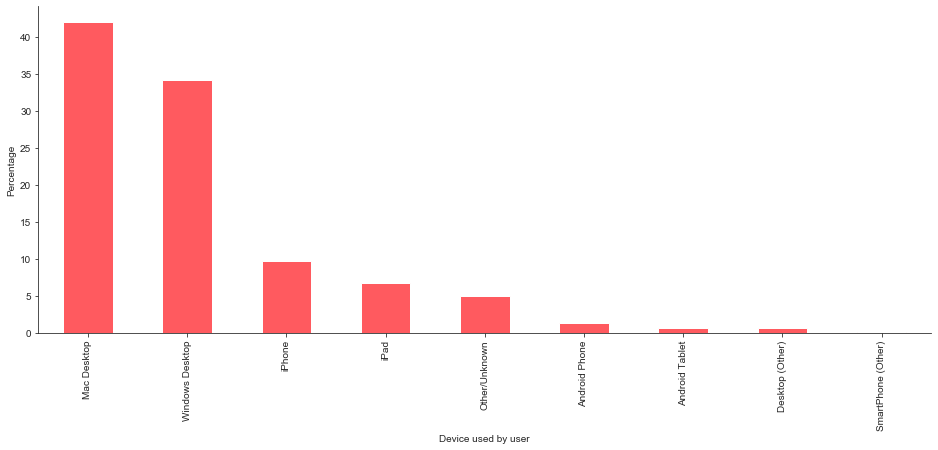

In [12]:
sns.set_style('ticks')
plt.figure(figsize=(16,6))
device_percentage = train['first_device_type'].value_counts() / train.shape[0] * 100
device_percentage.plot(kind='bar',color='#ff5a5f')
plt.xlabel('Device used by user')
plt.ylabel('Percentage')
sns.despine()

- On Desktop, Customer use apple product more than windows
- On mobile, custumer use apple aproduct more than android <br />
AirBnb could give prioritize to give an app's update for apple product first

### Age

In [13]:
train[train['age']<18].head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
193,3qsa4lo7eg,2010-03-06,20100306184019,2010-03-08,FEMALE,5.0,basic,3,en,sem-non-brand,google,NaN,Web,Other/Unknown,-unknown-,FR
482,rzhouzy2ok,2010-04-29,20100429161617,2010-04-29,FEMALE,5.0,facebook,0,en,other,craigslist,tracked-other,Web,Mac Desktop,Safari,IT
642,5yatk13sko,2010-05-20,20100520212258,NaN,-unknown-,5.0,facebook,2,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,NDF
660,593gkcul8c,2010-05-24,20100524042738,NaN,FEMALE,5.0,facebook,2,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF
776,tu2iorbez0,2010-06-07,20100607173548,NaN,MALE,5.0,facebook,2,en,other,craigslist,untracked,Web,Mac Desktop,Safari,NDF


In [14]:
train['signup_flow'].max()

25

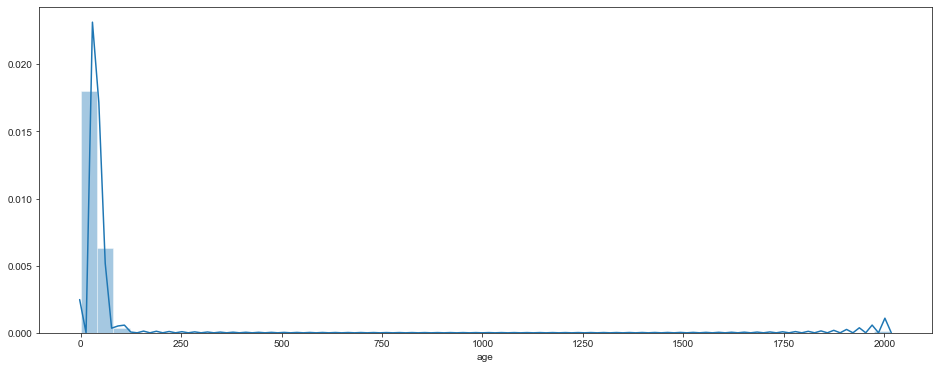

In [15]:
plt.figure(figsize=(16,6))
sns.distplot(train['age'].dropna())

In [9]:
train=pd.read_csv('train_users_2.csv')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [8]:
age = train['age'].values
train['age'] = np.where(np.logical_and(age>1919, age<2001), 2019-age, age)
train['age'][(train['age']>100) | (train['age']<18)]=np.NaN

fill_nan=np.random.randint(train['age'].mean()-train['age'].std(),train['age'].mean()+train['age'].std(),train['age'].isna().sum())
train['age'][train['age'].isna()]=fill_nan
train['age']=train['age'].astype(int)

C:\Users\Asyariati\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
C:\Users\Asyariati\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
C:\Users\Asyariati\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Asyariati\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


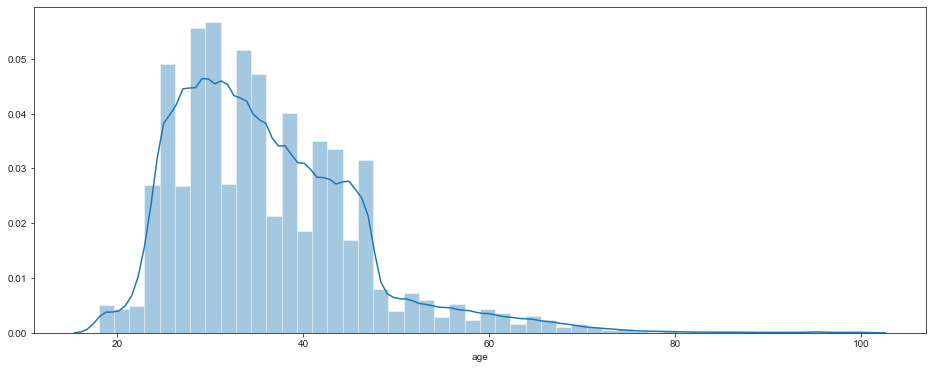

In [18]:
plt.figure(figsize=(16,6))
sns.distplot(train['age'].dropna())

create age bucket

In [9]:
age_range=[]

for i in train['age']:
    if i>55:
        age_range.append('Over 55')
    elif i>45:
        age_range.append('46 - 55')
    elif i>35:
        age_range.append('36 - 45')
    elif i>25:
        age_range.append('26 - 35')
    else:
        age_range.append('Below 26')

train['age_range']=age_range

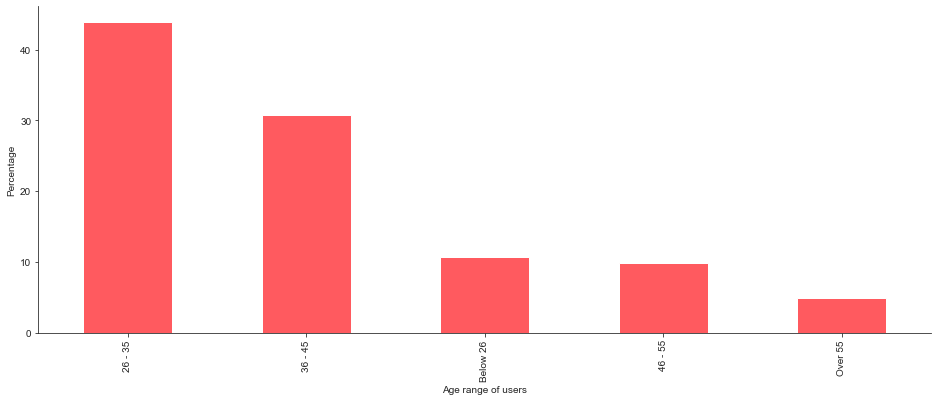

In [20]:
sns.set_style('ticks')
plt.figure(figsize=(16,6))
gender_percentage = train['age_range'].value_counts() / train.shape[0] * 100
gender_percentage.plot(kind='bar',color='#ff5a5f')
plt.xlabel('Age range of users')
plt.ylabel('Percentage')
sns.despine()

### Time

In [10]:
train['date_account_created_new'] = pd.to_datetime(train['date_account_created'])
train['yearmonth_date_first_active'] = train['timestamp_first_active'].apply(lambda x:str(x)[:6])
train['hour_first_active_new'] = train['timestamp_first_active'].apply(lambda x:int(str(x)[-6:-4]))
train['date_first_active_new'] = pd.to_datetime((train['timestamp_first_active'] // 1000000), format='%Y%m%d')
train['day_first_active_new']=train['date_first_active_new'].dt.weekday_name
train['date_first_booking'] = pd.to_datetime(train['date_first_booking'])
train['day_first_booking_new']=train['date_first_booking'].dt.weekday_name

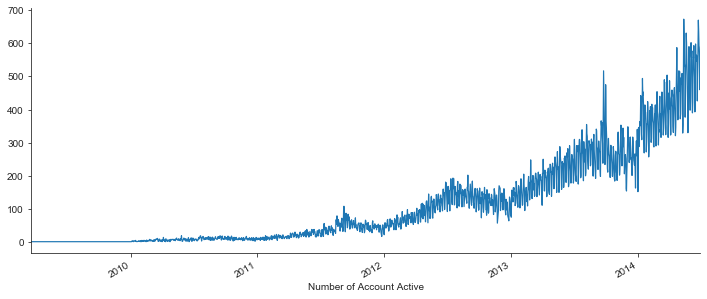

In [27]:
sns.set_style('ticks')
plt.figure(figsize=(12,5))
train['date_first_active_new'].value_counts().plot(kind='line', lw=1.2)
plt.xlabel('Number of Account Active')
# plt.autofmt_xdate()
sns.despine()

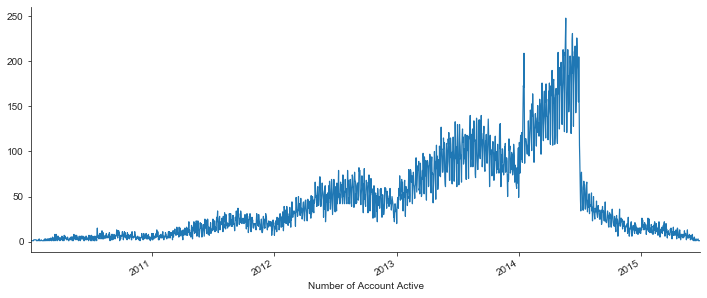

In [23]:
sns.set_style('ticks')
plt.figure(figsize=(12,5))
train['date_first_booking'].value_counts().plot(kind='line', lw=1.2)
plt.xlabel('Number of Account Active')
# plt.autofmt_xdate()
sns.despine()

In [53]:
train['dummy_first']=train['date_first_booking']

In [54]:
train['dummy_first'].fillna(0,inplace=True)

In [59]:
train.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'age_range',
       'date_account_created_new', 'yearmonth_date_first_active',
       'hour_first_active_new', 'date_first_active_new',
       'day_first_active_new', 'day_first_booking_new', 'dummy_first'],
      dtype='object')

In [11]:
train[['date_account_created_new','day_first_booking_new','date_first_active_new']]

,date_account_created_new,day_first_booking_new,date_first_active_new
0,2010-06-28,NaN,2009-03-19
1,2011-05-25,NaN,2009-05-23
2,2010-09-28,Monday,2009-06-09
3,2011-12-05,Saturday,2009-10-31
4,2010-09-14,Thursday,2009-12-08
5,2010-01-01,Saturday,2010-01-01
6,2010-01-02,Tuesday,2010-01-02
7,2010-01-03,Wednesday,2010-01-03
8,2010-01-04,Thursday,2010-01-04
9,2010-01-04,Monday,2010-01-04


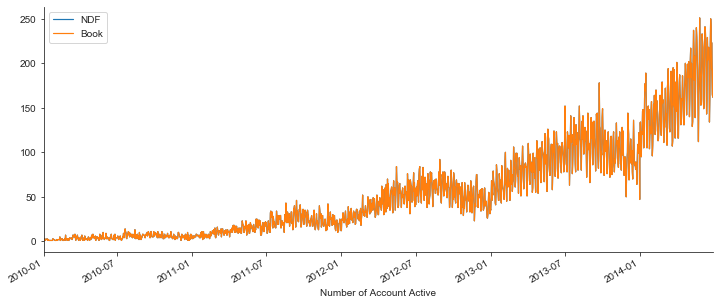

In [58]:
sns.set_style('ticks')
plt.figure(figsize=(12,5))
train[train['country_destination']!='NDF']['date_account_created_new'].value_counts().plot(kind='line', lw=1.2,label='NDF')
train[train['country_destination']!='NDF']['date_account_created_new'].value_counts().plot(kind='line', lw=1.2,label='Book')
plt.xlabel('Number of Account Active')
plt.legend()
# plt.autofmt_xdate()
sns.despine()

In [46]:
plt.Line2D(train['date_account_created_new'].value_counts().index,train['date_account_created_new'].value_counts().values)
plt.show()

In [40]:
sns.lineplot(x=train['date_account_created_new'].value_counts())

ValueError: array length 1634 does not match index length 213451

In [24]:
import datetime

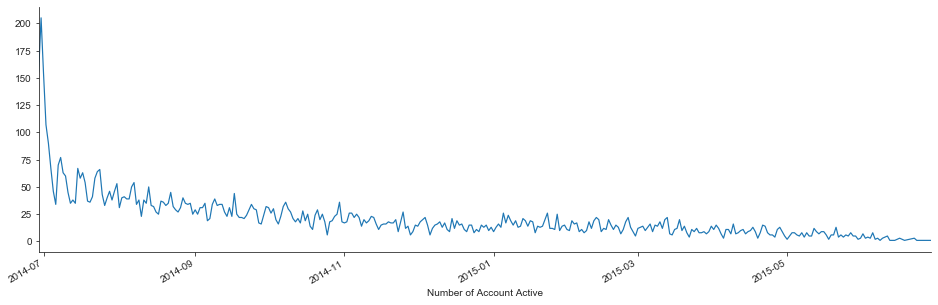

In [36]:
sns.set_style('ticks')
plt.figure(figsize=(16,5))
train[train['date_first_booking']>datetime.datetime(2014,6,28)]['date_first_booking'].value_counts().plot(kind='line', lw=1.2)
plt.xlabel('Number of Account Active')
# plt.autofmt_xdate()
sns.despine()

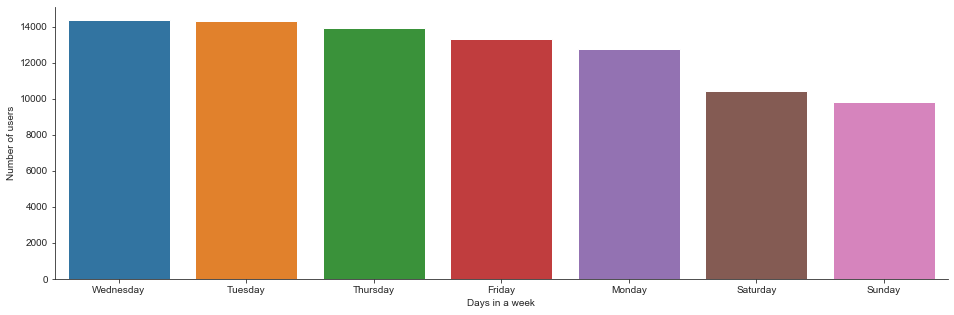

In [31]:
sns.set_style('ticks')
plt.figure(figsize=(16,5))
data_wo_NDF= train[train['country_destination']!='NDF']
sns.countplot(x='day_first_booking_new',data=data_wo_NDF,order=data_wo_NDF['day_first_booking_new'].value_counts().index)
plt.xlabel('Days in a week')
plt.ylabel('Number of users')
sns.despine()

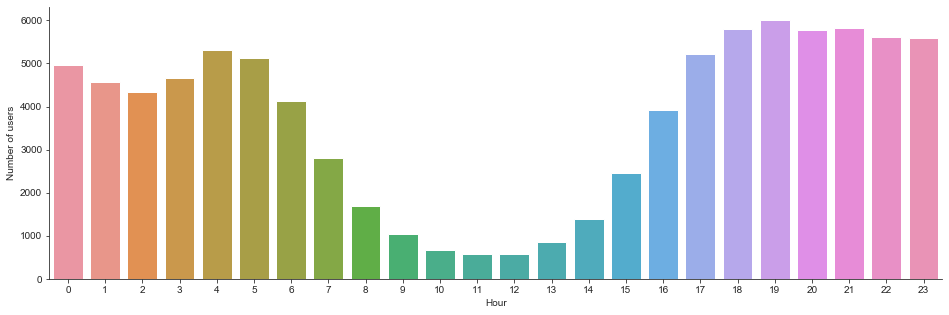

In [25]:
sns.set_style('ticks')
plt.figure(figsize=(16,5))
sns.countplot(x='hour_first_active_new',data=data_wo_NDF)
plt.xlabel('Hour')
plt.ylabel('Number of users')
sns.despine()

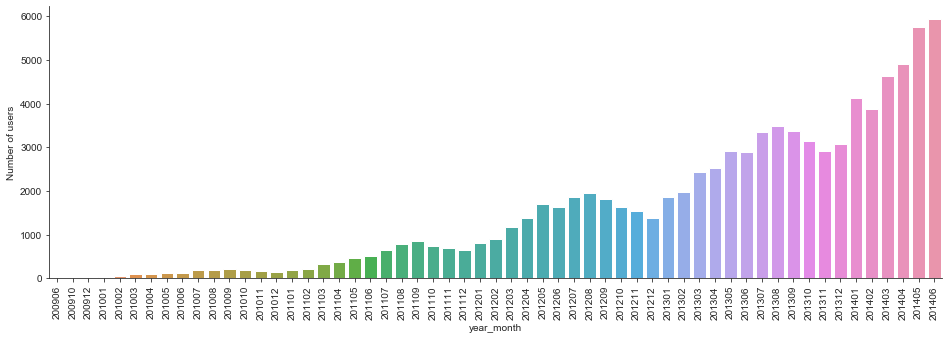

In [26]:
sns.set_style('ticks')
plt.figure(figsize=(16,5))
data_wo_NDF= train[train['country_destination']!='NDF']
sns.countplot(x='yearmonth_date_first_active',data=data_wo_NDF)
plt.xlabel('year_month')
plt.ylabel('Number of users')
plt.xticks(rotation=90)
sns.despine()

#### Signup

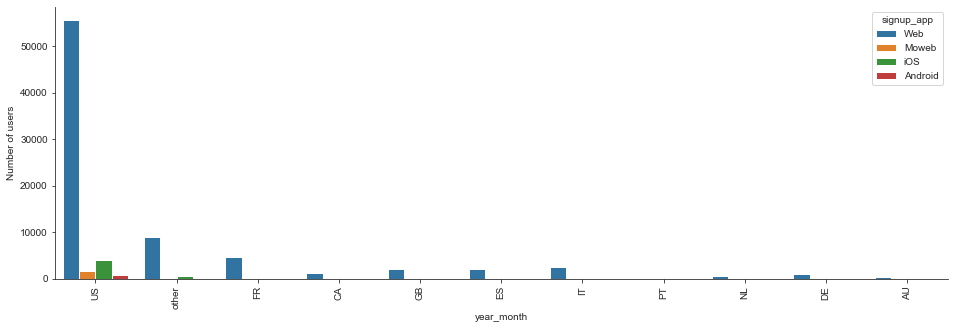

In [27]:
sns.set_style('ticks')
plt.figure(figsize=(16,5))
sns.countplot(x='country_destination',hue='signup_app',data=data_wo_NDF)
plt.xlabel('year_month')
plt.ylabel('Number of users')
plt.xticks(rotation=90)
sns.despine()

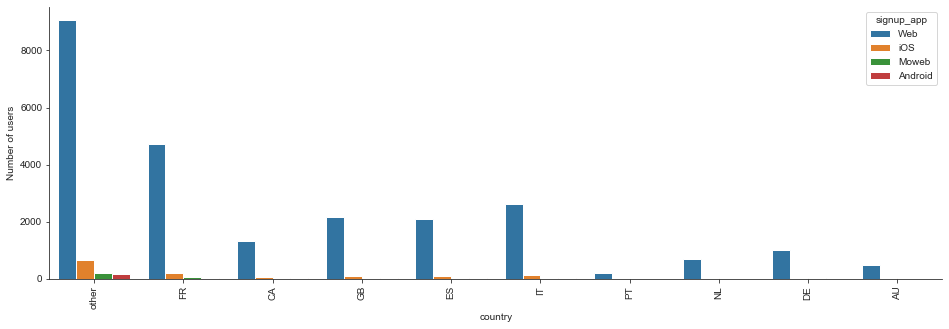

In [28]:
sns.set_style('ticks')
plt.figure(figsize=(16,5))
data_wo_NDFUS=data_wo_NDF[data_wo_NDF['country_destination']!='US']
sns.countplot(x='country_destination',hue='signup_app',data=data_wo_NDFUS)
plt.xlabel('country')
plt.ylabel('Number of users')
plt.xticks(rotation=90)
sns.despine()

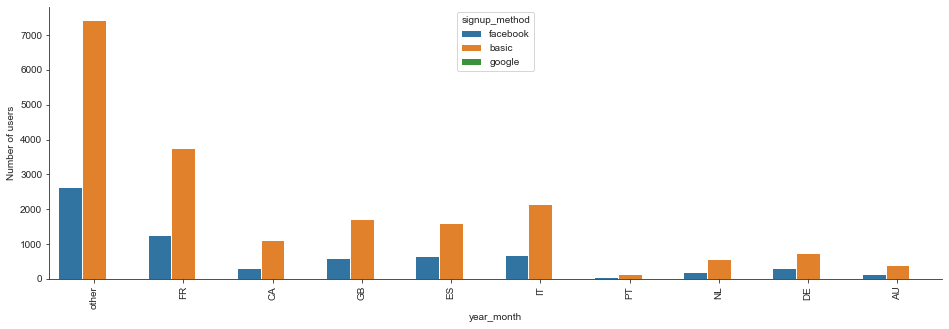

In [29]:
sns.set_style('ticks')
plt.figure(figsize=(16,5))
sns.countplot(x='country_destination',hue='signup_method',data=data_wo_NDFUS)
plt.xlabel('year_month')
plt.ylabel('Number of users')
plt.xticks(rotation=90)
sns.despine()

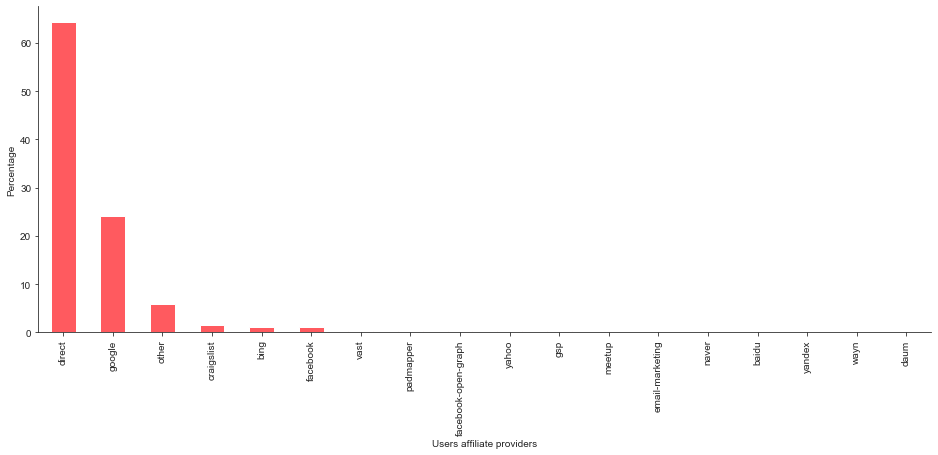

In [30]:
sns.set_style('ticks')
plt.figure(figsize=(16,6))
gender_percentage = train['affiliate_provider'].value_counts() / train.shape[0] * 100
gender_percentage.plot(kind='bar',color='#ff5a5f')
plt.xlabel('Users affiliate providers')
plt.ylabel('Percentage')
sns.despine()

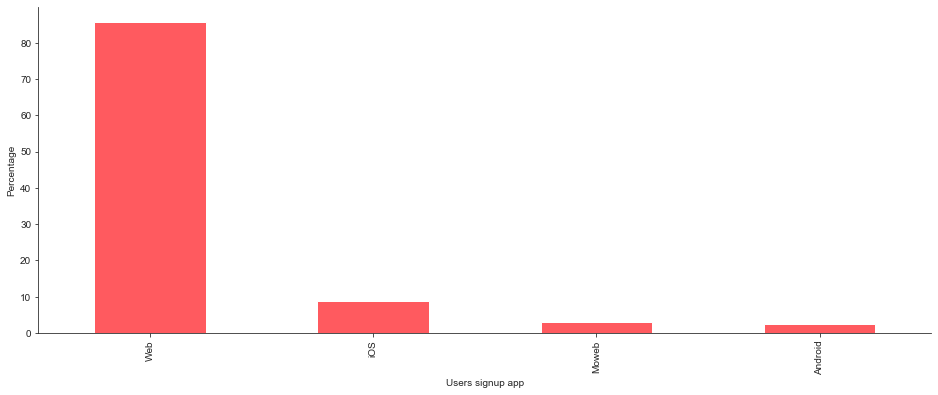

In [31]:
sns.set_style('ticks')
plt.figure(figsize=(16,6))
gender_percentage = train['signup_app'].value_counts() / train.shape[0] * 100
gender_percentage.plot(kind='bar',color='#ff5a5f')
plt.xlabel('Users signup app')
plt.ylabel('Percentage')
sns.despine()

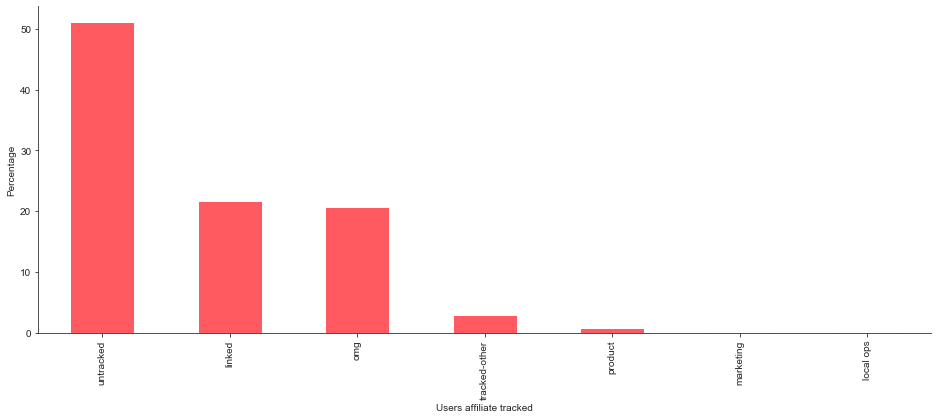

In [32]:
sns.set_style('ticks')
plt.figure(figsize=(16,6))
gender_percentage = train['first_affiliate_tracked'].value_counts() / train.shape[0] * 100
gender_percentage.plot(kind='bar',color='#ff5a5f')
plt.xlabel('Users affiliate tracked')
plt.ylabel('Percentage')
sns.despine()

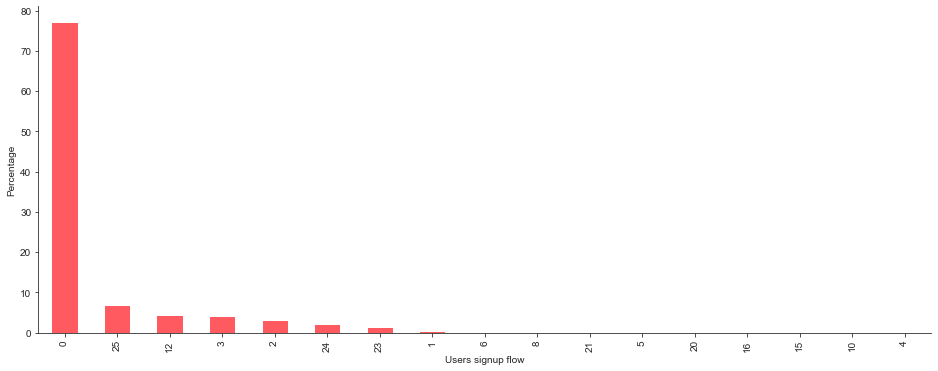

In [33]:
sns.set_style('ticks')
plt.figure(figsize=(16,6))
gender_percentage = train['signup_flow'].value_counts() / train.shape[0] * 100
gender_percentage.plot(kind='bar',color='#ff5a5f')
plt.xlabel('Users signup flow')
plt.ylabel('Percentage')
sns.despine()

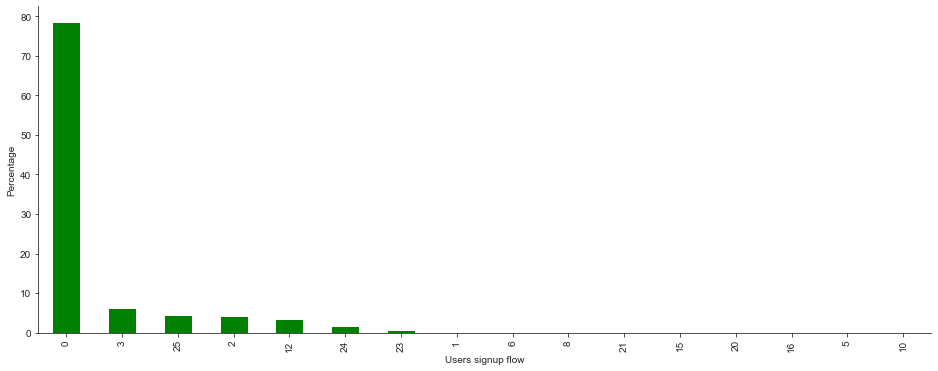

In [34]:
sns.set_style('ticks')
plt.figure(figsize=(16,6))
gender_percentage_wo_NDF=data_wo_NDF['signup_flow'].value_counts() / data_wo_NDF.shape[0] * 100
gender_percentage_wo_NDF.plot(kind='bar',color='g')
plt.xlabel('Users signup flow')
plt.ylabel('Percentage')
sns.despine()

In [35]:
data_only_NDF= train[train['country_destination']=='NDF']

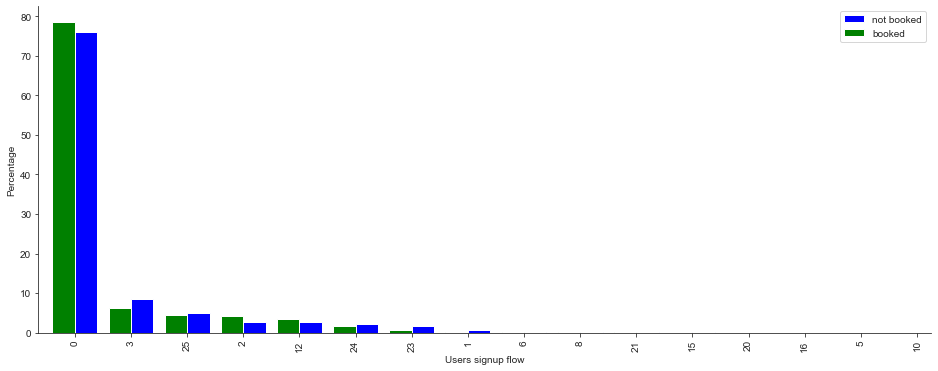

In [36]:
sns.set_style('ticks')
plt.figure(figsize=(16,6))
gender_percentage = data_only_NDF['signup_flow'].value_counts() / data_only_NDF.shape[0] * 100
gender_percentage.plot(kind='bar',color='b',position=0,label='not booked',width=.4)
gender_percentage_wo_NDF=data_wo_NDF['signup_flow'].value_counts() / data_wo_NDF.shape[0] * 100
gender_percentage_wo_NDF.plot(kind='bar',color='g',position=1,label='booked',width=.4)
plt.legend()
plt.xlabel('Users signup flow')
plt.ylabel('Percentage')
sns.despine()

In [12]:
train.to_csv('train.csv')

In [19]:
test.drop('day_first_booking_new',axis=1,inplace=True)

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 21 columns):
id                             62096 non-null object
date_account_created           62096 non-null datetime64[ns]
timestamp_first_active         62096 non-null int64
date_first_booking             0 non-null datetime64[ns]
gender                         62096 non-null object
age                            62096 non-null int32
signup_method                  62096 non-null object
signup_flow                    62096 non-null int64
language                       62096 non-null object
affiliate_channel              62096 non-null object
affiliate_provider             62096 non-null object
first_affiliate_tracked        62076 non-null object
signup_app                     62096 non-null object
first_device_type              62096 non-null object
first_browser                  62096 non-null object
age_range                      62096 non-null object
date_account_created_new       620

In [28]:
test.to_csv('test_final.csv')

In [14]:
pd.read_csv('train.csv')

,Unnamed: 0,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,...,first_device_type,first_browser,country_destination,age_range,date_account_created_new,yearmonth_date_first_active,hour_first_active_new,date_first_active_new,day_first_active_new,day_first_booking_new
0,0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,43,facebook,0,en,...,Mac Desktop,Chrome,NDF,36 - 45,2010-06-28,200903,4,2009-03-19,Thursday,NaN
1,1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,...,Mac Desktop,Chrome,NDF,36 - 45,2011-05-25,200905,17,2009-05-23,Saturday,NaN
2,2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,...,Windows Desktop,IE,US,Over 55,2010-09-28,200906,23,2009-06-09,Tuesday,Monday
3,3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,...,Mac Desktop,Firefox,other,36 - 45,2011-12-05,200910,6,2009-10-31,Saturday,Saturday
4,4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41,basic,0,en,...,Mac Desktop,Chrome,US,36 - 45,2010-09-14,200912,6,2009-12-08,Tuesday,Thursday
5,5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,42,basic,0,en,...,Mac Desktop,Chrome,US,36 - 45,2010-01-01,201001,21,2010-01-01,Friday,Saturday
6,6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46,basic,0,en,...,Mac Desktop,Safari,US,46 - 55,2010-01-02,201001,1,2010-01-02,Saturday,Tuesday
7,7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47,basic,0,en,...,Mac Desktop,Safari,US,46 - 55,2010-01-03,201001,19,2010-01-03,Sunday,Wednesday
8,8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50,basic,0,en,...,Mac Desktop,Safari,US,46 - 55,2010-01-04,201001,0,2010-01-04,Monday,Thursday
9,9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46,basic,0,en,...,Mac Desktop,Firefox,US,46 - 55,2010-01-04,201001,2,2010-01-04,Monday,Monday


In [13]:
pd.read_csv('test_final.csv')

,Unnamed: 0,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,...,first_affiliate_tracked,signup_app,first_device_type,first_browser,age_range,date_account_created_new,yearmonth_date_first_active,hour_first_active_new,date_first_active_new,day_first_active_new
0,0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35,facebook,0,en,...,untracked,Moweb,iPhone,Mobile Safari,26 - 35,2014-07-01,201407,0,2014-07-01,Tuesday
1,1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,25,basic,0,en,...,untracked,Moweb,iPhone,Mobile Safari,Below 26,2014-07-01,201407,0,2014-07-01,Tuesday
2,2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,36,basic,0,en,...,linked,Web,Windows Desktop,Chrome,36 - 45,2014-07-01,201407,0,2014-07-01,Tuesday
3,3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,23,basic,0,en,...,linked,Web,Windows Desktop,IE,Below 26,2014-07-01,201407,0,2014-07-01,Tuesday
4,4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,35,basic,0,en,...,untracked,Web,Mac Desktop,Safari,26 - 35,2014-07-01,201407,0,2014-07-01,Tuesday
5,5,szx28ujmhf,2014-07-01,20140701000336,NaN,FEMALE,28,basic,0,en,...,omg,Web,Windows Desktop,Chrome,26 - 35,2014-07-01,201407,0,2014-07-01,Tuesday
6,6,guenkfjcbq,2014-07-01,20140701000514,NaN,MALE,48,basic,25,en,...,untracked,iOS,iPhone,-unknown-,46 - 55,2014-07-01,201407,0,2014-07-01,Tuesday
7,7,tkpq0mlugk,2014-07-01,20140701000649,NaN,-unknown-,30,basic,0,en,...,untracked,Web,Mac Desktop,Chrome,26 - 35,2014-07-01,201407,0,2014-07-01,Tuesday
8,8,3xtgd5p9dn,2014-07-01,20140701000837,NaN,-unknown-,43,basic,0,en,...,untracked,Web,Mac Desktop,Chrome,36 - 45,2014-07-01,201407,0,2014-07-01,Tuesday
9,9,md9aj22l5a,2014-07-01,20140701002245,NaN,-unknown-,27,basic,0,en,...,omg,Web,Windows Desktop,Firefox,26 - 35,2014-07-01,201407,0,2014-07-01,Tuesday


In [67]:
dataNDF=train[train['country_destination']=='NDF']

In [81]:
list(data_wo_NDF['country_destination'].value_counts().values)

[62376, 10094, 5023, 2835, 2324, 2249, 1428, 1061, 762, 539, 217]

In [65]:
test.columns

Index(['Unnamed: 0', 'id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'age_range',
       'date_account_created_new', 'yearmonth_date_first_active',
       'hour_first_active_new', 'date_first_active_new',
       'day_first_active_new'],
      dtype='object')

In [39]:
train.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'age_range',
       'date_account_created_new', 'yearmonth_date_first_active',
       'hour_first_active_new', 'date_first_active_new',
       'day_first_active_new'],
      dtype='object')

In [83]:
row=[]
for i in session:
    row.append([i,str(session[i].dtype),session[i].isna().sum(),
               round(session[i].isna().sum()/len(session[i])*100,2),
               session[i].nunique(),session[i].sample(2).values])
    
df_feature=pd.DataFrame(row,columns=['dataFeatures','dataType','null','nullPct','unique','uniqueSample'])
df_feature

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,user_id,object,34496,0.33,135483,"[thrmwki920, nc3fmiiun6]"
1,action,object,79626,0.75,359,"[search_results, new]"
2,action_type,object,1126204,10.66,10,"[nan, data]"
3,action_detail,object,1126204,10.66,155,"[p3, nan]"
4,device_type,object,0,0.00,14,"[Windows Desktop, Windows Desktop]"
5,secs_elapsed,float64,136031,1.29,337661,"[34317.0, 32.0]"


In [95]:
session.groupby('device_type')['secs_elapsed'].mean().sort_values(ascending=False).head(15)

device_type
Blackberry                          53828.986258
Windows Phone                       42017.595105
-unknown-                           25603.201379
Linux Desktop                       25245.841644
Chromebook                          23592.867280
Windows Desktop                     22078.093608
iPad Tablet                         21060.748671
Mac Desktop                         19916.708755
iPhone                              17641.879840
Tablet                              16492.685965
Opera Phone                         15038.909091
iPodtouch                           14465.707789
Android App Unknown Phone/Tablet    13342.514479
Android Phone                       12435.433043
Name: secs_elapsed, dtype: float64

In [96]:
session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [101]:
train.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'age_range',
       'date_account_created_new', 'yearmonth_date_first_active',
       'hour_first_active_new', 'date_first_active_new',
       'day_first_active_new', 'day_first_booking_new', 'dummy_first'],
      dtype='object')

In [17]:
sess_user=pd.merge(session,train[['id','country_destination']],left_on='user_id',right_on='id',how='left').drop('id',axis=1)

In [21]:
sess_user=sess_user.sample(500000)

In [27]:
sess_user[sess_user['user_id']=='vvae4amv11']

,user_id,action,action_type,action_detail,device_type,secs_elapsed,country_destination
2687778,vvae4amv11,show,view,p3,iPad Tablet,182962.0,NDF
2687599,vvae4amv11,search_results,click,view_search_results,iPad Tablet,10892.0,NDF
2687933,vvae4amv11,ajax_refresh_subtotal,click,change_trip_characteristics,iPad Tablet,136.0,NDF
2687845,vvae4amv11,show_personalize,data,user_profile_content_update,iPad Tablet,1725.0,NDF
2687604,vvae4amv11,similar_listings,data,similar_listings,iPad Tablet,2427.0,NDF
2687673,vvae4amv11,search_results,click,view_search_results,iPad Tablet,701.0,NDF
2687868,vvae4amv11,ajax_check_dates,click,change_contact_host_dates,iPad Tablet,497750.0,NDF
2687622,vvae4amv11,search_results,click,view_search_results,iPad Tablet,676.0,NDF
2687666,vvae4amv11,index,view,user_wishlists,iPad Tablet,924.0,NDF
2687791,vvae4amv11,personalize,data,wishlist_content_update,iPad Tablet,2254.0,NDF


In [22]:
sess_user.to_csv('sample_sess.csv')

In [23]:
pd.read_csv('sample_sess.csv')

,Unnamed: 0,user_id,action,action_type,action_detail,device_type,secs_elapsed,country_destination
0,1401577,d279we3aja,personalize,data,wishlist_content_update,Mac Desktop,970.0,NDF
1,9685048,52vduho0k5,message_to_host_change,click,message_to_host_change,Windows Desktop,78526.0,NaN
2,9922410,0z4edwy2iw,show,view,p3,Android Phone,5045.0,NaN
3,3720532,eli35ksb3t,show,view,p3,iPhone,163.0,US
4,8117828,c2c73gkv9f,show,view,p3,Windows Desktop,245.0,NaN
5,3077241,ly0q4ccjny,search_results,click,view_search_results,Mac Desktop,56466.0,FR
6,5090714,i3yip0ma96,impressions,view,p4,Windows Desktop,2192.0,NDF
7,1746381,c64t8g66jt,index,view,user_wishlists,Windows Desktop,896.0,US
8,8102019,xjbcei3qtp,identity,-unknown-,-unknown-,Windows Desktop,809.0,NaN
9,3007398,ujqq4pqvfa,qt2,view,message_thread,Windows Desktop,2342.0,US
